In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime, date

import importlib
import Projet5_utils as utils
importlib.reload(utils)

PATH = "E:/OpenClassrooms/Projet5/Datasets"

In [13]:
    # Reference dataframe df0 = all orders from the first 500 days (between 700 and 200 days ago)
importlib.reload(utils)
df0 = utils.clean_engineer_set(PATH, 500)

In [14]:
df0

,days_since_order,number_of_orders,average_review_score,average_price,number_of_items,Cat_Other,Cat_alimentos,Cat_automotivo,Cat_bebes,Cat_beleza_saude,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
7c396fd4830fd04220f754e42b4e5bff,-0.186517,4.922398,0.271519,-0.489407,1.375335,0.000000,0.0,0.0000,5.44678,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.259957
7c142cf63193a1473d2e66489a9ae977,-0.621868,-0.159224,0.667883,-0.424134,-0.294006,0.000000,0.0,0.0000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,6.460552,0.0,0.0,0.000000
80bb27c7c16e8f973207a5086ab329e2,0.600819,-0.159224,-0.124845,0.121488,-0.294006,0.000000,0.0,4.3148,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
932afa1e708222e5821dac9cd5db4cae,1.101010,-0.159224,0.667883,-0.344650,-0.294006,0.000000,0.0,4.3148,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
39382392765b6dc74812866ee5ee92a7,2.147704,-0.159224,-2.503030,-0.557225,-0.294006,0.000000,0.0,0.0000,0.00000,0.000000,...,0.0,2.470863,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831ce3f1bacbd424fc4e38fbd4d66d29,1.860558,-0.159224,0.667883,0.079068,-0.294006,0.000000,0.0,0.0000,0.00000,0.000000,...,0.0,2.470863,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6359f309b166b0196dbf7ad2ac62bb5a,1.730879,-0.159224,0.667883,-0.280968,-0.294006,0.000000,0.0,0.0000,0.00000,3.018478,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
da62f9e57a76d978d02ab5362c509660,-1.362891,-0.159224,-0.124845,0.264654,-0.294006,0.000000,0.0,0.0000,5.44678,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


# RFM

In [15]:
# RFM variables
rfm = [
    'days_since_order',
    'number_of_orders',
    'average_price'
]

X_rfm0 = df0[rfm].values

In [16]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=5, random_state=1)  # compute reference clustering
cluster_kmeans0 = clusterer.fit_predict(X_rfm0)

customer_cluster0 = pd.DataFrame(cluster_kmeans0, index=df0.index) # new dataframe that contains only the cluster label
customer_cluster0.rename(columns={0: 'reference'}, inplace=True)

#### We will now iteratively add 15 days to the dataframe and recompute the clustering. We then restrict the new df to the customers present in the reference df only, and compare the 2 clusterings (new and reference) using the adjusted Rand index. This allows to quantify how much the clusters have changed (which customers in the reference changed clusters after X days)

In [17]:
from sklearn.metrics import adjusted_rand_score

list_durations = np.arange(0, 201, 15)
list_scores_rfm = []


for i in list_durations: # iteratively add 15 days
    print('duration : ', i)
    df_temp = utils.clean_engineer_set(PATH, 500+i) # cleaning, engineering and transforming the data in the considered time span
    X_rfm_temp = df_temp[rfm].values
    
    clusterer = KMeans(n_clusters=5, random_state=1) # clustering
    cluster_kmeans_temp = clusterer.fit_predict(X_rfm_temp)
    
    customer_cluster_temp = pd.DataFrame(cluster_kmeans_temp, index=df_temp.index) # new df containing only the cluster labels
    customer_cluster_temp.rename(columns={0: i}, inplace=True)
    
    # merge this new df with the reference cluster labels
    customer_cluster_grouped = pd.merge(customer_cluster0, customer_cluster_temp, how='inner', left_index=True, right_index=True)
    score = adjusted_rand_score(customer_cluster_grouped['reference'], customer_cluster_grouped[i]) # compute ARI
    
    list_scores_rfm.append(score) ## add to list
    print('score : ', score)

duration :  0
score :  1.0
duration :  15
score :  0.9361738388520539
duration :  30
score :  0.8715672581264013
duration :  45
score :  0.7950832536553045
duration :  60
score :  0.7430108257554037
duration :  75
score :  0.6888843623883586
duration :  90
score :  0.6323442060978293
duration :  105
score :  0.5851943988667458
duration :  120
score :  0.5384571370525068
duration :  135
score :  0.49593470134610484
duration :  150
score :  0.46905922512220793
duration :  165
score :  0.4368953102834546
duration :  180
score :  0.36536707022970266
duration :  195
score :  0.19198872787544569


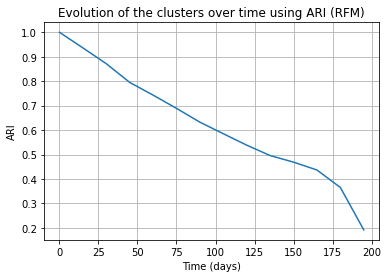

In [18]:
plt.plot(list_durations, list_scores_rfm)
plt.ylabel('ARI')
plt.xlabel('Time (days)')
plt.title('Evolution of the clusters over time using ARI (RFM)')

plt.grid()
plt.show()

# RFM + review score + average number of items per order
#### Same as previously, but we now take 2 other features into account

In [19]:
rfm_review = [
    'days_since_order',
    'number_of_orders',
    'average_price',
    'average_review_score',
    'number_of_items'
]

X_rfm_review0 = df0[rfm_review].values

In [20]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=7, random_state=1)
cluster_kmeans0 = clusterer.fit_predict(X_rfm_review0)

customer_cluster0 = pd.DataFrame(cluster_kmeans0, index=df0.index)
customer_cluster0.rename(columns={0: 'reference'}, inplace=True)

In [21]:
list_durations = np.arange(0, 201, 15)
list_scores_rfmr = []

for i in list_durations:
    print('duration : ', i)
    df_temp = utils.clean_engineer_set(PATH, 500+i)
    X_rfm_temp = df_temp[rfm_review].values
    
    clusterer = KMeans(n_clusters=7, random_state=1)
    cluster_kmeans_temp = clusterer.fit_predict(X_rfm_temp)
    
    customer_cluster_temp = pd.DataFrame(cluster_kmeans_temp, index=df_temp.index)
    customer_cluster_temp.rename(columns={0: i}, inplace=True)
    
    customer_cluster_grouped = pd.merge(customer_cluster0, customer_cluster_temp, how='inner', left_index=True, right_index=True)
    score = adjusted_rand_score(customer_cluster_grouped['reference'], customer_cluster_grouped[i])
    
    list_scores_rfmr.append(score)
    print('score : ', score)

duration :  0
score :  1.0
duration :  15
score :  0.9466011004868939
duration :  30
score :  0.8816923151749749
duration :  45
score :  0.836637026749867
duration :  60
score :  0.7880209805491063
duration :  75
score :  0.7297540365887606
duration :  90
score :  0.688783945022259
duration :  105
score :  0.6579175352058138
duration :  120
score :  0.6244044804429209
duration :  135
score :  0.5820538192532388
duration :  150
score :  0.5627188268123229
duration :  165
score :  0.5314338818063998
duration :  180
score :  0.8862120696687216
duration :  195
score :  0.3945123687408911


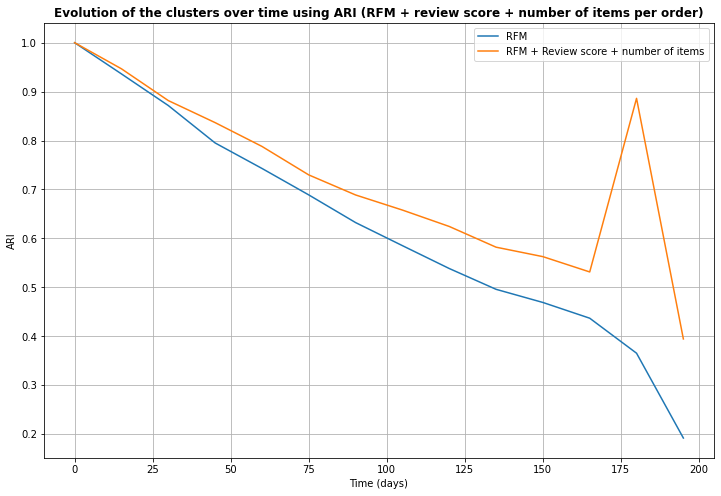

In [22]:
fig = plt.figure(figsize=(12, 8))

plt.plot(list_durations, list_scores_rfm, label='RFM')
plt.plot(list_durations, list_scores_rfmr, label='RFM + Review score + number of items')

plt.ylabel('ARI')
plt.xlabel('Time (days)')
plt.title('Evolution of the clusters over time using ARI (RFM + review score + number of items per order)', fontsize=12, fontweight='semibold')
plt.legend()
plt.grid()
plt.show()

### We assume the peak at 180 days is due only to chance